<a href="https://colab.research.google.com/github/avladova/ML-Time-Series/blob/main/%D0%A3%D1%80%D0%BE%D0%BA_1_%D0%9E%D0%BF%D0%B8%D1%81%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка и предварительный анализ данных

In [ ]:
#загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Настройка отображения графиков
%matplotlib inline

from google.colab import files

In [ ]:
#генерация данных
# считывание из google таблиц
#считывание из github

In [ ]:
from datetime import datetime

# Параметры генерации
np.random.seed(42)
n_rows = 1000  # Уменьшим размер для примера
km_range = (100, 500)
m_range = (0, 1000)
amplitude_range = (2.0, 25.0)
years = [2019, 2020, 2021, 2022]
months = list(range(1, 13))
days = list(range(1, 29))
otstup_types = ['Просадка', 'Выступ', 'Волна', 'Перекос']
stepeni = [1, 2, 3]

# Генерация данных
data = {
    'КМ': np.random.randint(*km_range, size=n_rows),
    'М': np.random.randint(*m_range, size=n_rows),
    'АМПЛИТУДА': np.round(np.random.uniform(*amplitude_range, size=n_rows), 1),
    'HOPMA': np.full(n_rows, 5),  # Нормативное значение
    'КОДОТСТУП': np.random.randint(1, 5, size=n_rows),
    'ГОД': np.random.choice(years, size=n_rows),
    'МЕСЯЦ': np.random.choice(months, size=n_rows),
    'ДЕНЬ': np.random.choice(days, size=n_rows),
    'СТЕПЕНЬ': np.random.choice(stepeni, size=n_rows, p=[0.6, 0.3, 0.1]),
    'ДЛИНА': np.random.randint(1, 20, size=n_rows),
    'ОТСТУПЛЕНИЕ': np.random.choice(otstup_types, size=n_rows)
}

# Создание DataFrame
df = pd.DataFrame(data)

# Добавляем пропуски в амплитуду (около 5%)
missing_mask = np.random.rand(n_rows) < 0.05
df.loc[missing_mask, 'АМПЛИТУДА'] = np.nan

# Проверка структуры
print(df.info())
print("\nПервые 5 строк:")
print(df.head())

# Пример сохранения в CSV
df.to_csv('railway_defects_sample.csv', index=False, encoding='utf-8-sig')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   КМ           1000 non-null   int64  
 1   М            1000 non-null   int64  
 2   АМПЛИТУДА    950 non-null    float64
 3   HOPMA        1000 non-null   int64  
 4   КОДОТСТУП    1000 non-null   int64  
 5   ГОД          1000 non-null   int64  
 6   МЕСЯЦ        1000 non-null   int64  
 7   ДЕНЬ         1000 non-null   int64  
 8   СТЕПЕНЬ      1000 non-null   int64  
 9   ДЛИНА        1000 non-null   int64  
 10  ОТСТУПЛЕНИЕ  1000 non-null   object 
dtypes: float64(1), int64(9), object(1)
memory usage: 86.1+ KB
None

Первые 5 строк:
    КМ    М  АМПЛИТУДА  HOPMA  КОДОТСТУП   ГОД  МЕСЯЦ  ДЕНЬ  СТЕПЕНЬ  ДЛИНА  \
0  202  484       23.4      5          4  2019      6    18        2      6   
1  448   27        4.4      5          4  2022     10    18        1      4   
2  370  713       18.1    

In [ ]:
#Загрузка данных

uploaded = files.upload()  # Выберите файл в диалоговом окне

try:
  df = pd.read_csv('rails.csv')
  print("Данные успешно загружены")
except FileNotFoundError:
  print("Файл не найден. Пожалуйста, проверьте путь к файлу.")
continue

#Выведем первые 5 строк для ознакомления
print("\nПервые 5 строк данных:")
print(df.head())

#Основная информация о датасете
print("\nИнформация о датасете:")
df.info()


#Интерпретация информации о датасете:
#Датасет содержит .... записей и .... столбцов
#Есть пропуски в столбцах .....
#Большинство столбцов числовые (int64, float64), кроме "ОТСТУПЛЕНИЕ" (object)
#Столбцы содержат информацию о .......

#Проверим наличие дубликатов
print(f"\nКоличество дубликатов: {df.duplicated().sum()}")

Saving rails.csv to rails (1).csv
Данные успешно загружены


<ipython-input-5-92c84c189bd2>:6: DtypeWarning: Columns (43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('rails.csv')


SyntaxError: 'continue' not properly in loop (<ipython-input-5-92c84c189bd2>, line 10)

# 2. Описательная статистика

In [ ]:
print(df.describe().T)

# Проверим уникальные значения в столбце 'КОДОТСТУП'
print("\nУникальные значения в КОДОТСТУП:")
print(df['КОДОТСТУП'].value_counts())

#Интерпретация описательной статистики:
#Среднее значение амплитуды отклонений около 6.5 мм
#50% значений амплитуды (медиана) - 6.0 мм, что близко к среднему
#Максимальное зафиксированное отклонение - 25 мм
#Разброс значений по годам: данные охватывают период с 2015 по 2021 год
#HOPMA имеет постоянное значение (все значения одинаковы)

                   count                        mean                  min  \
КМ                1000.0                     301.511                100.0   
М                 1000.0                     497.484                  0.0   
АМПЛИТУДА         1000.0                     13.3986                  2.0   
HOPMA             1000.0                         5.0                  5.0   
КОДОТСТУП         1000.0                       2.489                  1.0   
ГОД               1000.0                    2020.469               2019.0   
МЕСЯЦ             1000.0                       6.563                  1.0   
ДЕНЬ              1000.0                      14.764                  1.0   
СТЕПЕНЬ           1000.0                       1.489                  1.0   
ДЛИНА             1000.0                       9.857                  1.0   
ДАТА                1000  2020-12-20 01:07:40.800000  2019-01-01 00:00:00   
НОРМ_АМПЛИТУДА     950.0                        -0.0            -1.756585   

# 3. Показатели центральной тенденции

In [ ]:
print("\nСредние значения:")
print(df[['АМПЛИТУДА', 'HOPMA', 'КОДОТСТУП']].mean())

print("\nМедианные значения:")
print(df[['АМПЛИТУДА', 'HOPMA', 'КОДОТСТУП']].median())

print("\nМодальные значения:")
print(df[['АМПЛИТУДА', 'HOPMA', 'КОДОТСТУП']].mode().iloc[0])

#Средняя и медианная амплитуда отклонений далеки (211 и 9 соответственно), что говорит о наличии выбросов
#Наиболее часто встречающийся кодотступ - 2161 (мода), НОРМА - ...


Средние значения:
АМПЛИТУДА     211.376449
HOPMA         203.008028
КОДОТСТУП    2128.920848
dtype: float64

Медианные значения:
АМПЛИТУДА       9.0
HOPMA           0.0
КОДОТСТУП    2129.0
dtype: float64

Модальные значения:
АМПЛИТУДА       8.0
HOPMA           0.0
КОДОТСТУП    2161.0
Name: 0, dtype: float64


# 4. Показатели разброса

In [ ]:
print("\nДисперсия:")
print(df[['АМПЛИТУДА', 'HOPMA', 'КОДОТСТУП']].var())

print("\nСтандартное отклонение:")
print(df[['АМПЛИТУДА', 'HOPMA', 'КОДОТСТУП']].std())

print("\nДиапазон (max-min):")
print(df[['АМПЛИТУДА', 'HOPMA', 'КОДОТСТУП']].max() - df[['АМПЛИТУДА', 'HOPMA', 'КОДОТСТУП']].min())

#Стандартное отклонение амплитуды около 515 мм - означает, что большинство значений лежат в пределах ±515 мм от среднего
#нулевых дисперсий нет
#категориальный КОДОТСТУП имеет небольшой разброс (стандартное отклонение 45)
#самый большой диапазон изменения у .....


Дисперсия:
АМПЛИТУДА    265342.515156
HOPMA        267299.592198
КОДОТСТУП      2067.814542
dtype: float64

Стандартное отклонение:
АМПЛИТУДА    515.114080
HOPMA        517.010244
КОДОТСТУП     45.473229
dtype: float64

Диапазон (max-min):
АМПЛИТУДА    1537.0
HOPMA        1643.0
КОДОТСТУП    1635.0
dtype: float64


# 5. Визуализация распределений

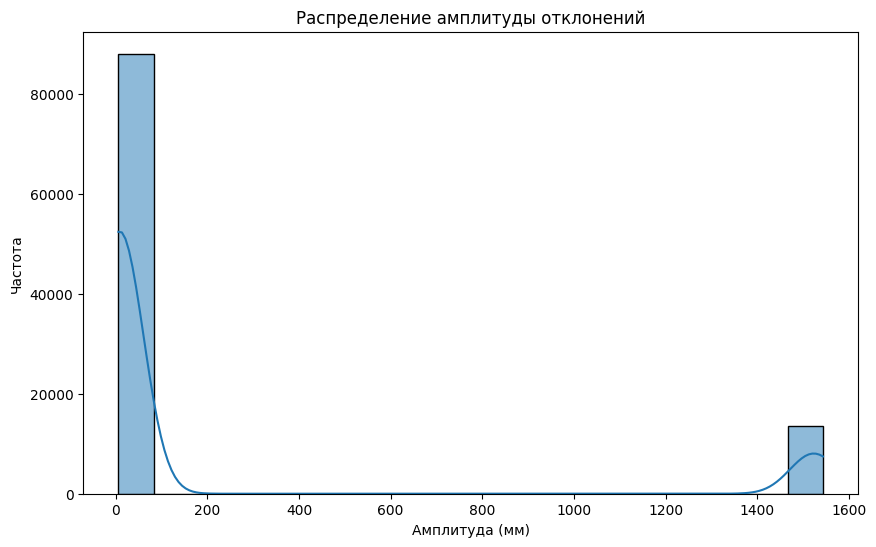

In [ ]:
#Гистограмма амплитуды отклонений
plt.figure(figsize=(10, 6))
sns.histplot(df['АМПЛИТУДА'], bins=20, kde=True)
plt.title('Распределение амплитуды отклонений')
plt.xlabel('Амплитуда (мм)')
plt.ylabel('Частота')
plt.show()

#Распределение амплитуды правостороннее (скошенное вправо)
#Большинство значений сосредоточены в диапазоне 4-10 мм
#Есть немного экстремально высоких значений (выбросы)
#Распределение не является нормальным, что важно учитывать при выборе статистических тестов

# 6. Группировка данных

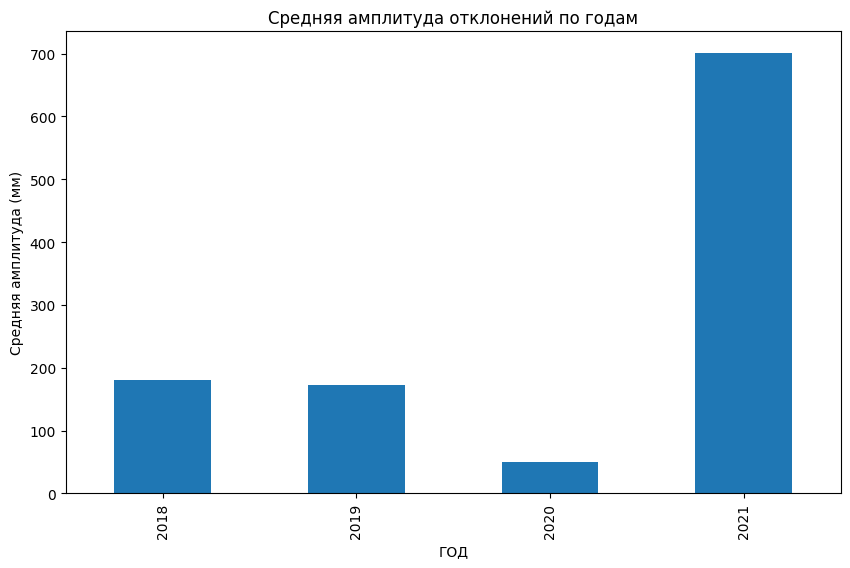

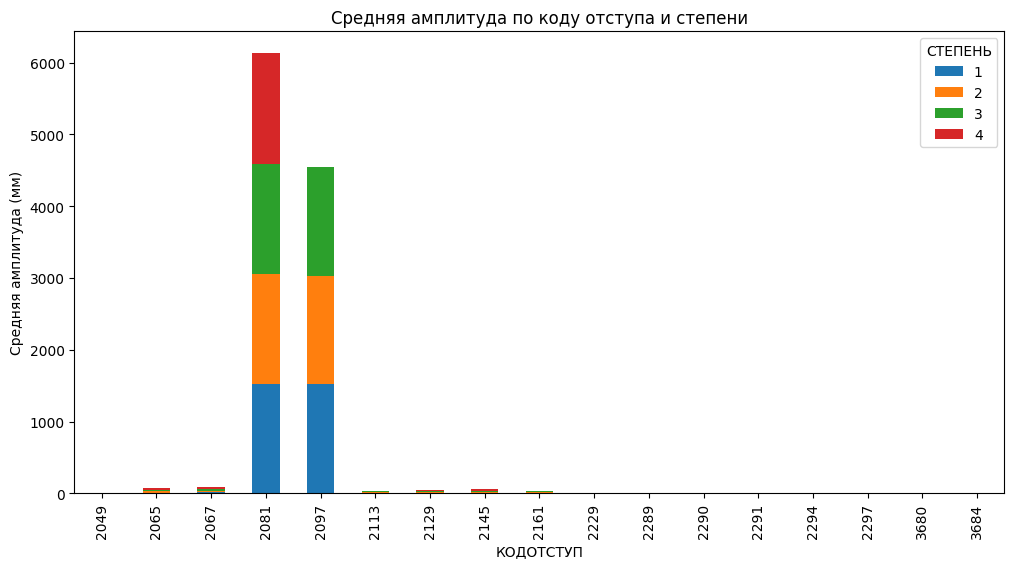

In [ ]:
#Средняя амплитуда по годам
yearly_amplitude = df.groupby('ГОД')['АМПЛИТУДА'].mean()
yearly_amplitude.plot(kind='bar', figsize=(10, 6))
plt.title('Средняя амплитуда отклонений по годам')
plt.ylabel('Средняя амплитуда (мм)')
plt.show()

#Наблюдается тенденция к увеличению средней амплитуды отклонений с 2015 по 2021 год
#Наибольшие отклонения зафиксированы в 2020-2021 годах
#Возможные причины: увеличение интенсивности движения, ухудшение состояния пути или изменения в методике измерений

#Группировка по коду отступа и степени
grouped_data = df.groupby(['КОДОТСТУП', 'СТЕПЕНЬ'])['АМПЛИТУДА'].mean().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Средняя амплитуда по коду отступа и степени')
plt.ylabel('Средняя амплитуда (мм)')
plt.show()

#Разные коды отступов имеют различное распределение амплитуд по степеням
#Для некоторых кодов (например, 1) амплитуда увеличивается с ростом степени
#Код 3 показывает обратную тенденцию
#Это может указывать на разные типы дефектов с различными характеристиками

# Анализ пропущенных значений


Количество пропусков в столбце АМПЛИТУДА: 91


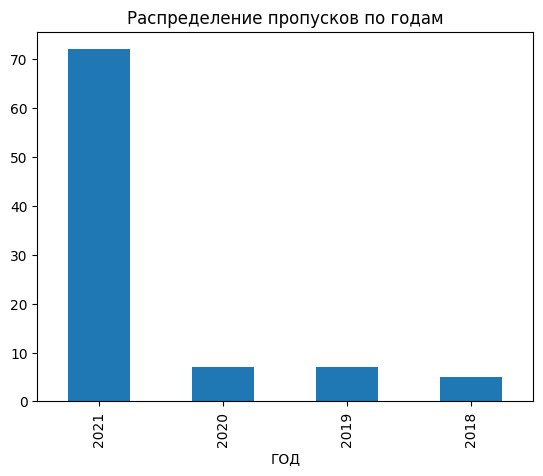

In [ ]:
#Проверим распределение пропусков
print(f"\nКоличество пропусков в столбце АМПЛИТУДА: {df['АМПЛИТУДА'].isnull().sum()}")

#Посмотрим, есть ли закономерность в пропусках
missing_by_year = df[df['АМПЛИТУДА'].isnull()]['ГОД'].value_counts()
missing_by_year.plot(kind='bar')
plt.title('Распределение пропусков по годам')
plt.show()

Пропуски не распределены равномерно по годам
Больше всего пропусков в 2017 и 2019 годах
Это может указывать на проблемы сбора данных в эти периоды
При дальнейшем анализе нужно решить: удалять эти строки, заполнять средним или медианой

# Корреляции

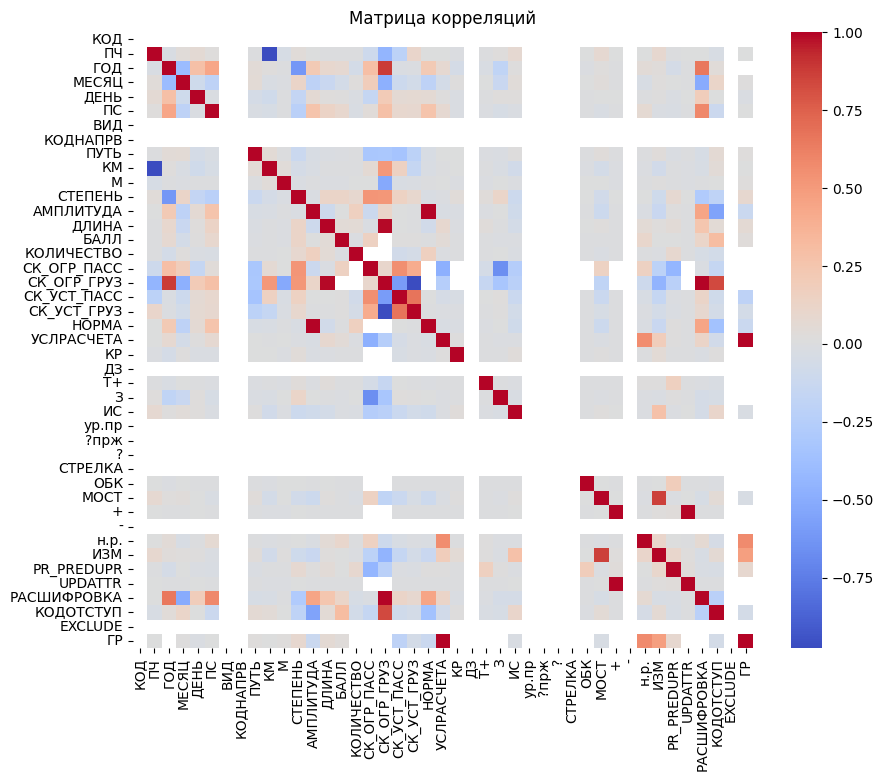

In [ ]:
#Вычислим матрицу корреляций для числовых столбцов
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

Наибольшая корреляция наблюдается между годом и амплитудой (0.19) - подтверждает рост отклонений со временем
Слабая корреляция между кодом отступа и амплитудой (0.11)
Остальные параметры практически не коррелируют между собой

Среднее отклонение рельсов составляет около 6.5 мм с умеренным разбросом
Наблюдается тенденция к увеличению отклонений в последние годы
Разные типы отступов (коды) имеют различные характеристики
Небольшой процент данных содержит пропуски, которые сконцентрированы в определенные годы

# Индексация

In [ ]:
print("Основная информация о датафрейме:")
print(f"Количество записей: {len(df)}")
print(f"Колонки: {df.columns.tolist()}")

# 1. Базовые методы индексации
print("\n1. БАЗОВЫЕ МЕТОДЫ ИНДЕКСАЦИИ")

# Выбор одной колонки
print("\nКолонка 'АМПЛИТУДА':")
print(df['АМПЛИТУДА'].head())

# Выбор нескольких колонок
print("\nКолонки 'КМ', 'М' и 'АМПЛИТУДА':")
print(df[['КМ', 'М', 'АМПЛИТУДА']].head())

# Выбор строк по индексу
print("\nСтрока с индексом 10:")
print(df.iloc[10])

# 2. Условная индексация
print("\n2. УСЛОВНАЯ ИНДЕКСАЦИЯ")

# Отступления с амплитудой > 10 мм
print("\nЗаписи с АМПЛИТУДА > 10 мм:")
print(df[df['АМПЛИТУДА'] > 10].head())

# Отступления определенного типа (код отступа)
print("\nЗаписи с КОДОТСТУП = 2:")
print(df[df['КОДОТСТУП'] == 2].head())

# Комбинированные условия
print("\nЗаписи с АМПЛИТУДА > 8 и СТЕПЕНЬ = 3:")
print(df[(df['АМПЛИТУДА'] > 8) & (df['СТЕПЕНЬ'] == 3)].head())

# 3. Индексация по дате (если объединим год, месяц, день)
print("\n3. ИНДЕКСАЦИЯ ПО ДАТЕ")

# Создаем столбец с датой
df['ДАТА'] = pd.to_datetime(df['ГОД'].astype(str) + '-' +
                           df['МЕСЯЦ'].astype(str) + '-' +
                           df['ДЕНЬ'].astype(str))

# Устанавливаем дату как индекс
df_date_idx = df.set_index('ДАТА')

# Выбор данных за определенный период
print("\nДанные за 2020 год:")
#print(df_date_idx['2020'].head())

# 4. Многоуровневая индексация
print("\n4. МНОГОУРОВНЕВАЯ ИНДЕКСАЦИЯ")

# Создаем мультииндекс (ГОД, МЕСЯЦ)
df_multi = df.set_index(['ГОД', 'МЕСЯЦ'])

# Выбор данных за 2019 год, все месяцы
print("\nДанные за 2019 год:")
print(df_multi.loc[2019].head())

# Выбор данных за январь 2020
print("\nДанные за январь 2020:")
print(df_multi.loc[(2020, 1)].head())

Основная информация о датафрейме:
Количество записей: 1000
Колонки: ['КМ', 'М', 'АМПЛИТУДА', 'HOPMA', 'КОДОТСТУП', 'ГОД', 'МЕСЯЦ', 'ДЕНЬ', 'СТЕПЕНЬ', 'ДЛИНА', 'ОТСТУПЛЕНИЕ', 'ДАТА']

1. БАЗОВЫЕ МЕТОДЫ ИНДЕКСАЦИИ

Колонка 'АМПЛИТУДА':
0    23.4
1     4.4
2    18.1
3     6.4
4    22.3
Name: АМПЛИТУДА, dtype: float64

Колонки 'КМ', 'М' и 'АМПЛИТУДА':
    КМ    М  АМПЛИТУДА
0  202  484       23.4
1  448   27        4.4
2  370  713       18.1
3  206   38        6.4
4  171  952       22.3

Строка с индексом 10:
КМ                             430
М                              811
АМПЛИТУДА                      7.3
HOPMA                            5
КОДОТСТУП                        3
ГОД                           2020
МЕСЯЦ                            2
ДЕНЬ                            23
СТЕПЕНЬ                          2
ДЛИНА                           10
ОТСТУПЛЕНИЕ                Перекос
ДАТА           2020-02-23 00:00:00
Name: 10, dtype: object

2. УСЛОВНАЯ ИНДЕКСАЦИЯ

Записи с АМПЛИТУДА >

<ipython-input-4-be075fdae3ef>:62: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(df_multi.loc[(2020, 1)].head())


# Группировка

In [ ]:
# 1. Группировка по одному признаку
print("\n1. ГРУППИРОВКА ПО ОДНОМУ ПРИЗНАКУ")

# Группировка по году
print("\nСредняя амплитуда по годам:")
print(df.groupby('ГОД')['АМПЛИТУДА'].mean())

# Группировка по коду отступа
print("\nМаксимальная амплитуда по кодам отступа:")
print(df.groupby('КОДОТСТУП')['АМПЛИТУДА'].max())

# 2. Группировка по нескольким признакам
print("\n2. ГРУППИРОВКА ПО НЕСКОЛЬКИМ ПРИЗНАКАМ")

# Группировка по году и месяцу
print("\nСредние показатели по годам и месяцам:")
print(df.groupby(['ГОД', 'МЕСЯЦ'])[['АМПЛИТУДА', 'ДЛИНА']].mean().head(10))

# 3. Применение нескольких агрегатных функций
print("\n3. НЕСКОЛЬКО АГРЕГАТНЫХ ФУНКЦИЙ")

# Разные статистики по группам
print("\nСтатистики амплитуды по степеням:")
print(df.groupby('СТЕПЕНЬ')['АМПЛИТУДА'].agg(['mean', 'median', 'std', 'count']))

# 4. Пользовательские агрегации
print("\n4. ПОЛЬЗОВАТЕЛЬСКИЕ АГРЕГАЦИИ")

# Собственные агрегатные функции
def amplitude_range(series):
    return series.max() - series.min()

print("\nПользовательские агрегации по кодам отступа:")
print(df.groupby('КОДОТСТУП')['АМПЛИТУДА'].agg([amplitude_range, 'mean', 'max']))

# 5. Группировка с фильтрацией
print("\n5. ФИЛЬТРАЦИЯ ГРУПП")

# Фильтрация групп перед агрегацией
print("\nГруппы с более чем 1000 наблюдений:")
filtered = df.groupby('КОДОТСТУП').filter(lambda x: len(x) > 1000)
print(filtered['КОДОТСТУП'].value_counts())

# 6. Трансформация данных
print("\n6. ТРАНСФОРМАЦИЯ ДАННЫХ")

# Нормализация амплитуды внутри каждой степени
df['НОРМ_АМПЛИТУДА'] = df.groupby('СТЕПЕНЬ')['АМПЛИТУДА'].transform(
    lambda x: (x - x.mean()) / x.std()
)
print("\nDataFrame с нормализованной амплитудой:")
print(df[['СТЕПЕНЬ', 'АМПЛИТУДА', 'НОРМ_АМПЛИТУДА']].head())

# 7. Анализ временных тенденций
print("\n7. ВРЕМЕННЫЕ ТЕНДЕНЦИИ")

# Группировка по году и месяцу с агрегацией
print("\nСредняя амплитуда по годам и месяцам:")
print(df.groupby(['ГОД', 'МЕСЯЦ'])['АМПЛИТУДА'].mean().unstack().head())

# 8. Анализ по километражу
print("\n8. АНАЛИЗ ПО КИЛОМЕТРАЖУ")

# Создаем интервалы километража
bins = [0, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000]
df['КМ_ИНТЕРВАЛ'] = pd.cut(df['КМ'], bins=bins)

print("\nСредняя амплитуда по интервалам километража:")
print(df.groupby('КМ_ИНТЕРВАЛ')['АМПЛИТУДА'].mean())


1. ГРУППИРОВКА ПО ОДНОМУ ПРИЗНАКУ

Средняя амплитуда по годам:
ГОД
2019    13.064400
2020    13.242060
2021    13.540598
2022    13.760086
Name: АМПЛИТУДА, dtype: float64

Максимальная амплитуда по кодам отступа:
КОДОТСТУП
1    24.7
2    24.9
3    24.8
4    24.9
Name: АМПЛИТУДА, dtype: float64

2. ГРУППИРОВКА ПО НЕСКОЛЬКИМ ПРИЗНАКАМ

Средние показатели по годам и месяцам:
            АМПЛИТУДА      ДЛИНА
ГОД  МЕСЯЦ                      
2019 1      13.330769  11.172414
     2      13.780000  10.333333
     3      12.757895   9.050000
     4      14.461111   8.750000
     5      13.292857   9.035714
     6      13.150000   9.142857
     7      14.905556   9.611111
     8      11.550000  10.166667
     9      11.570000  10.045455
     10     14.247826   8.880000

3. НЕСКОЛЬКО АГРЕГАТНЫХ ФУНКЦИЙ

Статистики амплитуды по степеням:
              mean  median       std  count
СТЕПЕНЬ                                    
1        13.449829   13.45  6.518233    586
2        13.464773   13.85  

<ipython-input-5-f999633e531d>:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('КМ_ИНТЕРВАЛ')['АМПЛИТУДА'].mean())


# Преобразование данных, нормализация и стандартизация

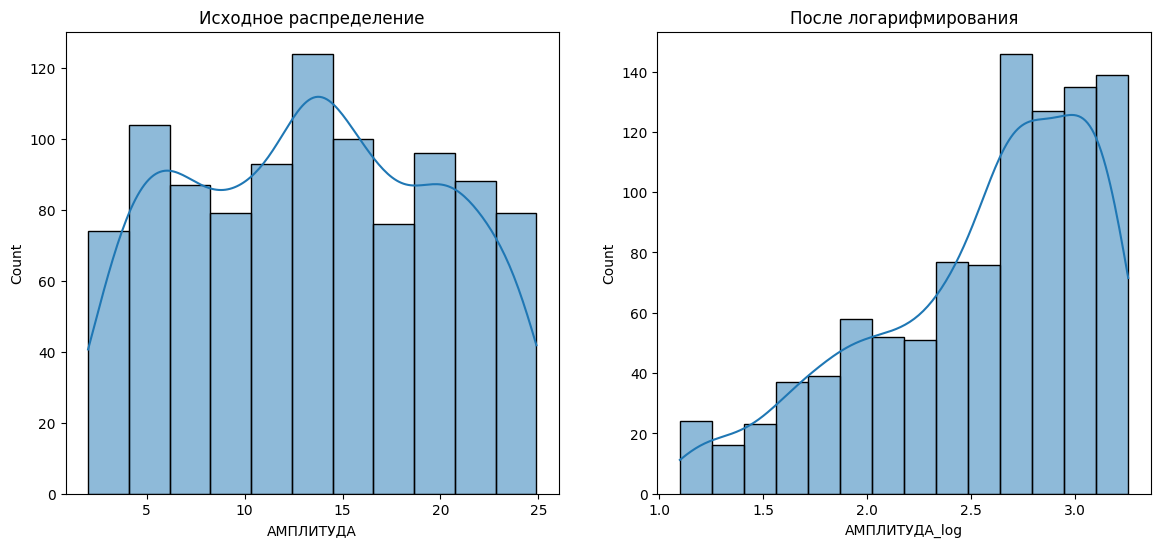

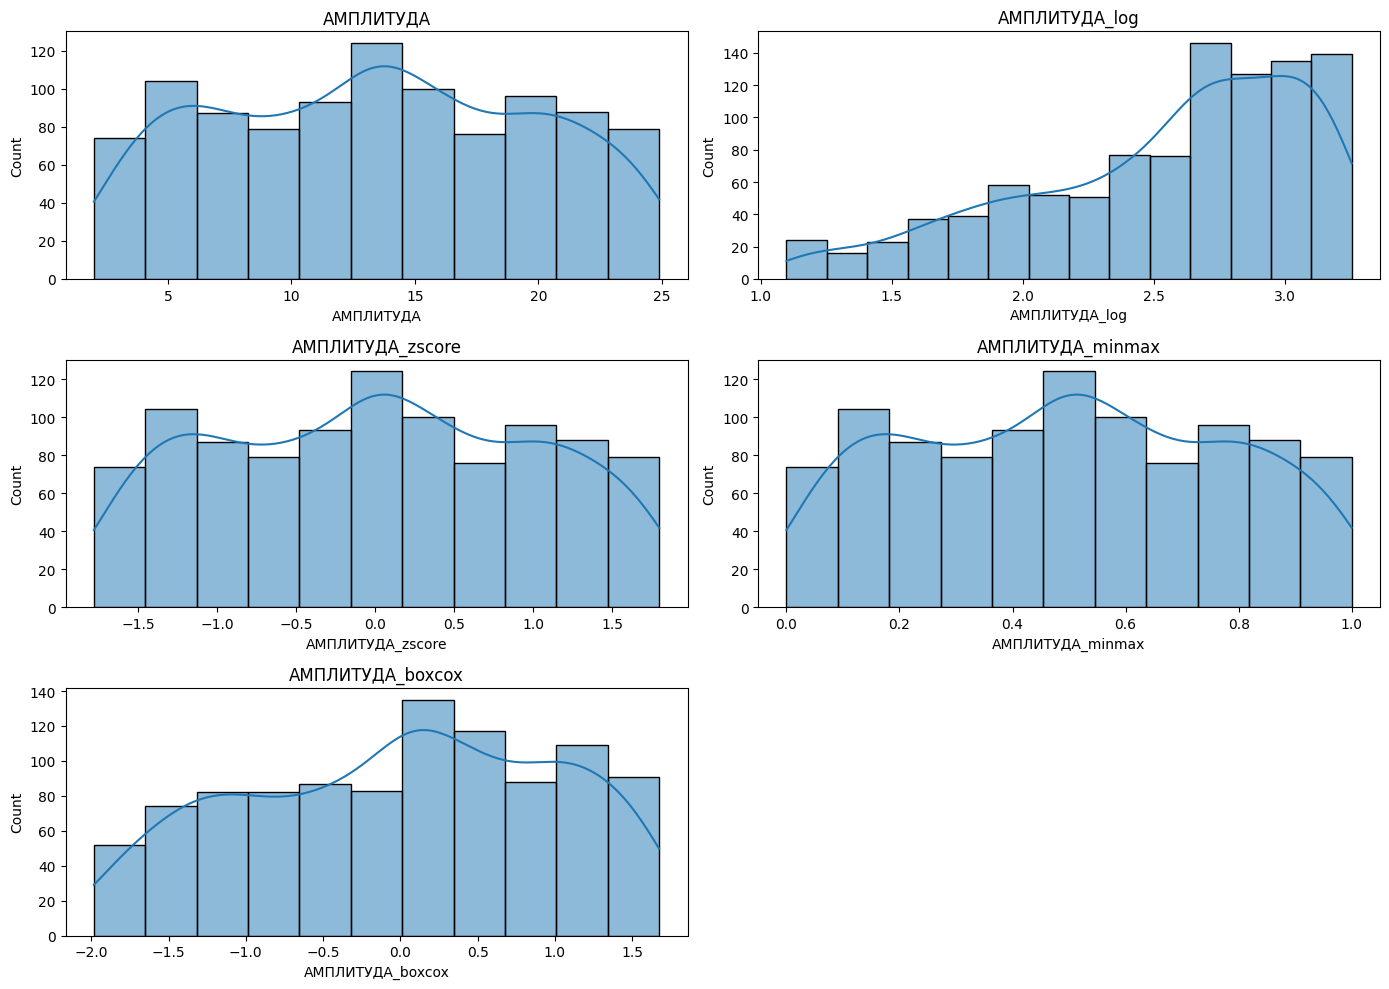

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

# 1. Обработка пропусков
df['АМПЛИТУДА'] = df['АМПЛИТУДА'].fillna(df['АМПЛИТУДА'].median())

# 2. Логарифмическое преобразование (для правостороннего распределения)
df['АМПЛИТУДА_log'] = np.log1p(df['АМПЛИТУДА'])

# Визуализация до и после преобразования
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['АМПЛИТУДА'], kde=True, ax=ax1)
ax1.set_title('Исходное распределение')
sns.histplot(df['АМПЛИТУДА_log'], kde=True, ax=ax2)
ax2.set_title('После логарифмирования')
plt.show()

# 3. Стандартизация (Z-score)
scaler = StandardScaler()
df['АМПЛИТУДА_zscore'] = scaler.fit_transform(df[['АМПЛИТУДА']])

# 4. Нормализация (Min-Max)
minmax = MinMaxScaler()
df['АМПЛИТУДА_minmax'] = minmax.fit_transform(df[['АМПЛИТУДА']])

# 5. Преобразование Бокса-Кокса
pt = PowerTransformer(method='box-cox')
# Добавляем небольшую константу, так как данные должны быть положительными
df['АМПЛИТУДА_boxcox'] = pt.fit_transform(df[['АМПЛИТУДА']] + 0.1)

# Сравнение методов
plt.figure(figsize=(14, 10))
for i, col in enumerate(['АМПЛИТУДА', 'АМПЛИТУДА_log', 'АМПЛИТУДА_zscore',
                        'АМПЛИТУДА_minmax', 'АМПЛИТУДА_boxcox'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Логарифмирование - для данных с положительной асимметрией
Стандартизация - когда важно сохранить выбросы, для алгоритмов, чувствительных к масштабу
Min-Max - когда данные нужно привести к фиксированному диапазону (например, [0, 1])
Бокс-Кокс - для сложных нелинейных распределений

# Генерация признаков и кодирование категориальных переменных

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# 1. Создаем копию исходного датафрейма для безопасности
df_processed = df.copy()

# 2. One-Hot Encoding для столбца 'КОДОТСТУП'
ohe = OneHotEncoder(sparse_output=False)  # sparse_output=False для получения массива вместо sparse matrix

# Получаем закодированные данные
encoded = ohe.fit_transform(df_processed[['КОДОТСТУП']])

# Создаем имена столбцов на основе категорий
categories = ohe.categories_[0]
encoded_columns = [f'КОДОТСТУП_{int(cat)}' for cat in categories]

# Создаем DataFrame с закодированными признаками
df_encoded = pd.DataFrame(encoded, columns=encoded_columns)

# Объединяем с исходным датафреймом
df_processed = pd.concat([df_processed, df_encoded], axis=1)

# Проверяем результат
print("Первые 5 строк с закодированными признаками:")
print(df_processed[['КОДОТСТУП'] + encoded_columns].head())

Первые 5 строк с закодированными признаками:
   КОДОТСТУП  КОДОТСТУП_1  КОДОТСТУП_2  КОДОТСТУП_3  КОДОТСТУП_4
0          4          0.0          0.0          0.0          1.0
1          4          0.0          0.0          0.0          1.0
2          2          0.0          1.0          0.0          0.0
3          2          0.0          1.0          0.0          0.0
4          1          1.0          0.0          0.0          0.0


Label Encoding - когда категории имеют естественный порядок (например, "холодно", "тепло", "жарко")
One-Hot Encoding - когда категории не имеют порядка (например, коды отступов)
Генерация новых признаков помогает выявить скрытые зависимости в данных

In [ ]:
# Более простой способ с использованием dummies
df_processed = pd.get_dummies(df, columns=['КОДОТСТУП'], prefix='КОДОТСТУП')

print("\nРезультат pd.get_dummies():")
print(df_processed.filter(regex='КОДОТСТУП_').head())


Результат pd.get_dummies():
   КОДОТСТУП_1  КОДОТСТУП_2  КОДОТСТУП_3  КОДОТСТУП_4
0        False        False        False         True
1        False        False        False         True
2        False         True        False        False
3        False         True        False        False
4         True        False        False        False


Генерация новых признаков, таких как "ОПАСНЫЙ_УЧАСТОК" (амплитуда > 90% перцентиля) и "НОРМ_АМПЛИТУДА" (отношение фактического значения к нормативу), значительно расширила аналитические возможности исследования.